In [2]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
pd.set_option('display.max_columns', None)
from tqdm.notebook import tqdm

In [3]:
adult_train = pd.read_csv('adult.data', 
                          names=['age',
                               'workclass',
                                'fnlwgt',
                               'education',
                               'education_num',
                               'martial-status',
                               'occupation',
                               'relationship',
                               'race',
                               'sex',
                               'capital-gain',
                               'capital-loss',
                               'hours-per-week',
                               'native-country',
                               'label'])

In [4]:
adult_test = pd.read_csv('adult.test', delimiter=',',
                        names=['age',
                               'workclass',
                                'fnlwgt',
                               'education',
                               'education_num',
                               'martial-status',
                               'occupation',
                               'relationship',
                               'race',
                               'sex',
                               'capital-gain',
                               'capital-loss',
                               'hours-per-week',
                               'native-country',
                               'label'])

### Train data prep

In [5]:
adult_train = adult_train.astype({'age':'int64'})

In [6]:
def i(adult_train):    
    if adult_train.age <= 20:
        val='16-20'
    elif 21 <= adult_train.age <= 30:
        val='21-30'
    elif 31 <= adult_train.age <= 40:
        val='31-40'
    elif 41 <= adult_train.age <= 50:
        val='41-50'
    elif 51 <= adult_train.age <= 60:
        val='51-60'
    else:
        val='60+'
    return val

adult_train['age_group'] = adult_train.apply(i, axis=1)

In [7]:
adult_train['label'] = adult_train.label.replace(' ','')

In [8]:
train_duplicated = adult_train[adult_train.duplicated()]
train_duplicated.shape

(24, 16)

In [9]:
adult_train = adult_train.drop_duplicates(keep='first').reset_index(drop=True)

In [10]:
adult_train = adult_train.replace(' ','').replace('\?','None',regex=True)

In [11]:
adult_train.head()

,age,workclass,fnlwgt,education,education_num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,31-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,21-30


### Test data prep

In [12]:
adult_test = adult_test.drop(adult_test.index[0]).reset_index()

In [13]:
adult_test.drop(['index'],axis=1,inplace=True)

In [14]:
adult_test = adult_test.astype({'age':'int64'})

In [15]:
def i(adult_test):    
    if adult_test.age <= 20:
        val='16-20'
    elif 21 <= adult_test.age <= 30:
        val='21-30'
    elif 31 <= adult_test.age <= 40:
        val='31-40'
    elif 41 <= adult_test.age <= 50:
        val='41-50'
    elif 51 <= adult_test.age <= 60:
        val='51-60'
    else:
        val='60+'
    return val

adult_test['age_group'] = adult_test.apply(i, axis=1)

In [16]:
test_duplicated = adult_test[adult_test.duplicated()]
test_duplicated.shape

(5, 16)

In [17]:
adult_test = adult_test.drop_duplicates(keep='first').reset_index(drop=True)
adult_test.head()

,age,workclass,fnlwgt,education,education_num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,age_group
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,21-30
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,31-40
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,21-30
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,41-50
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.,16-20


##### adult_test.isnull().sum()

In [18]:
adult_test = adult_test.replace(' ','').replace('\?','None',regex=True)

### 1ai

In [ ]:
aged_wealth = adult_train.groupby(['age_group','label']).count()[['age']]
aged_wealth.columns = ['count']
aged_wealth

In [ ]:
plt.figure()
fig = aged_wealth['count'].unstack().plot(kind='area',
                                   figsize=(5,5),
                                   stacked= False)
fig.grid(linestyle='--')
fig.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
fig.set_title('Count of People with a Salary of above or below $50,000 per annum')
fig.set_xlabel('Age Group')
fig.set_ylabel('Count')

In [ ]:
sex_wealth = adult_train.groupby(['sex','label']).count()[['age']]
sex_wealth.columns = ['count']
sex_wealth['perc'] = sex_wealth / sex_wealth.groupby(level=0).sum()
sex_wealth

In [ ]:
plt.figure()
fig = sex_wealth['count'].unstack().plot(kind='bar',
                                   figsize=(5,5),
                                        rot=0)
fig.grid(linestyle='--')
fig.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
fig.set_title('Count of Males and Females with a Salary of above or below $50,000 per annum')
fig.set_xlabel('Gender')
fig.set_ylabel('Count')
fig.set_ylim(0,16000)

<Figure size 432x288 with 0 Axes>

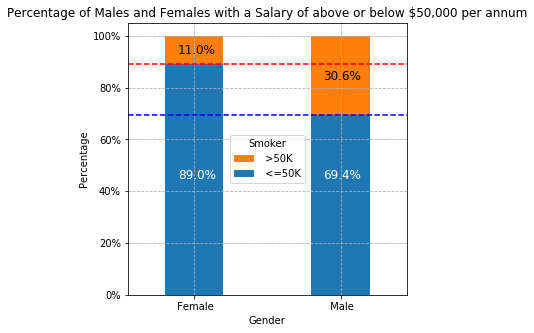

In [22]:
plt.figure()
fig = sex_wealth['perc'].unstack().plot(kind='bar',
                                   figsize=(5,5),
                                   stacked=True,
                                       rot=0,
                                       width=0.4)
fig.grid(linestyle='--')
fig.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
fig.set_title('Percentage of Males and Females with a Salary of above or below $50,000 per annum')
fig.set_xlabel('Gender')
fig.set_ylabel('Percentage')
plt.axhline(y=0.890, linestyle='--',color='r')
plt.text(x=-0.11,y=0.93, s='11.0%', alpha=1, color='black',size=12)
plt.text(x=-0.11,y=0.45, s='89.0%', alpha=1, color='white',size=12)
plt.axhline(y=0.694, linestyle='--',color='b')
plt.text(x=0.88,y=0.83, s='30.6%', alpha=1, color='black',size=12)
plt.text(x=0.88,y=0.45, s='69.4%', alpha=1, color='white',size=12)
handles, labels = fig.get_legend_handles_labels()
fig.legend(reversed(handles), reversed(labels), title='Smoker', loc=10)

In [23]:
sex_wealth

count      perc
sex     label                  
 Female  <=50K   9583  0.890448
         >50K    1179  0.109552
 Male    <=50K  15115  0.694145
         >50K    6660  0.305855

In [24]:
occ_wealth = adult_train.groupby(['occupation','label']).count()[['age']]
occ_wealth.columns = ['count']
occ_wealth['perc'] = occ_wealth / occ_wealth.groupby(level=0).sum()
occ_wealth.sort_values(ascending=False,by=['occupation','count'])

count      perc
occupation         label                  
 Transport-moving   <=50K   1277  0.799624
                    >50K     320  0.200376
 Tech-support       <=50K    644  0.694714
                    >50K     283  0.305286
 Sales              <=50K   2667  0.730685
                    >50K     983  0.269315
 Protective-serv    <=50K    438  0.674884
                    >50K     211  0.325116
 Prof-specialty     <=50K   2278  0.550774
                    >50K    1858  0.449226
 Priv-house-serv    <=50K    146  0.993197
                    >50K       1  0.006803
 Other-service      <=50K   3154  0.958371
                    >50K     137  0.041629
 None               <=50K   1652  0.896365
                    >50K     191  0.103635
 Machine-op-inspct  <=50K   1751  0.875500
                    >50K     249  0.124500
 Handlers-cleaners  <=50K   1283  0.937180
                    >50K      86  0.062820
 Farming-fishing    <=50K    877  0.884073
                    >50K     115  0.115927
 Exec-managerial    <=50K   2097  0.515867
                    >50K    1968  0.484133
 Craft-repair       <=50K   3165  0.773083
                    >50K     929  0.226917
 Armed-Forces       <=50K      8  0.888889
                    >50K       1  0.111111
 Adm-clerical       <=50K   3261  0.865446
                    >50K     507  0.134554

Text(0, 0.5, 'Count')

<Figure size 432x288 with 0 Axes>

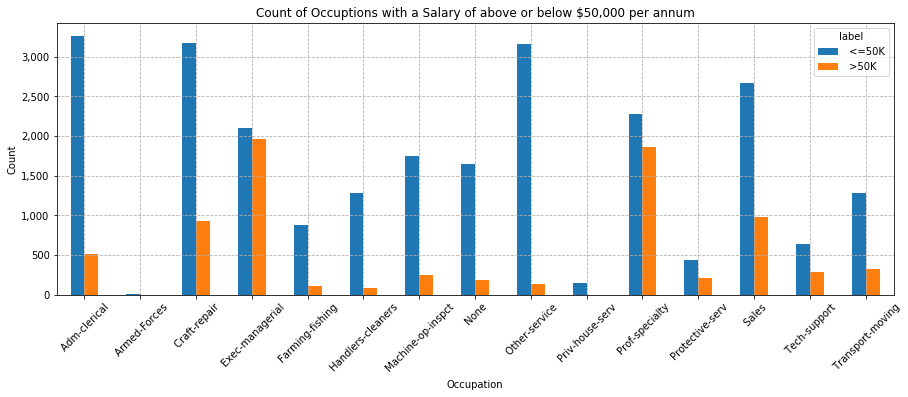

In [25]:
plt.figure()
fig = occ_wealth['count'].unstack().plot(kind='bar',
                                   figsize=(15,5),
                                        width=0.5,
                                        rot=45)
fig.grid(linestyle='--')
fig.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
fig.set_title('Count of Occuptions with a Salary of above or below $50,000 per annum')
fig.set_xlabel('Occupation')
fig.set_ylabel('Count')

Text(0, 0.5, 'Percentage')

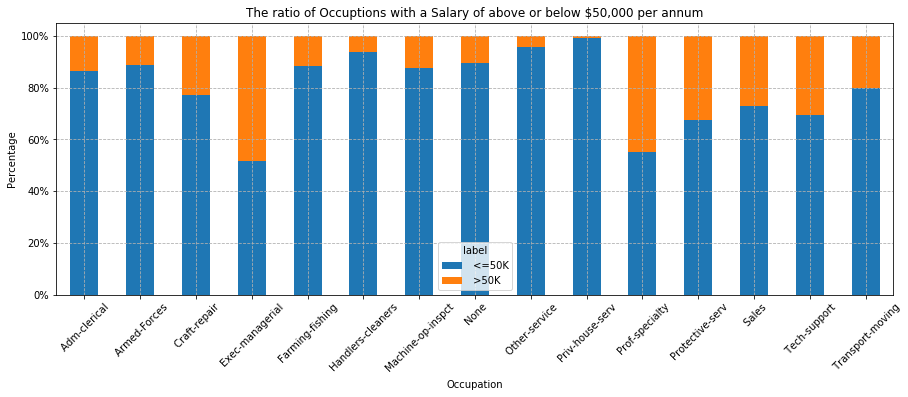

In [26]:
fig = occ_wealth['perc'].unstack().plot(kind='bar',
                                   figsize=(15,5),
                                   stacked=True,
                                       rot=45)
fig.grid(linestyle='--')
fig.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
fig.set_title('The ratio of Occuptions with a Salary of above or below $50,000 per annum')
fig.set_xlabel('Occupation')
fig.set_ylabel('Percentage')

## Building an Estimator

In [19]:
adult_train['label'] = adult_train['label'].apply(lambda x: '1' if x == ' >50K' else '0')

In [20]:
adult_test['label'] = adult_test['label'].apply(lambda x: '1' if x == ' >50K.' else '0')

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
cat_list = ['workclass','martial-status','occupation','relationship','race','sex','native-country','education','age_group']

### Training Data

In [23]:
for ele in cat_list:
    add = pd.get_dummies(adult_train[ele], prefix=ele)
    adult_train_class = adult_train.join(add)
    adult_train = adult_train_class

In [24]:
data_vars = adult_train_class.columns.values.tolist() # column headers are converted into a list
to_keep = [i for i in data_vars if i not in cat_list]
#create a new list by comparing with the list of categorical variables - 'cat_list'

In [25]:
train = adult_train[to_keep]

In [26]:
train.shape

(32537, 115)

### Testing Data

In [27]:
#Testing Data
for ele in cat_list:
    add = pd.get_dummies(adult_test[ele], prefix=ele)
    adult_test_class = adult_test.join(add)
    adult_test = adult_test_class

In [28]:
data_vars = adult_test_class.columns.values.tolist() # column headers are converted into a list
to_keep = [i for i in data_vars if i not in cat_list]
#create a new list by comparing with the list of categorical variables - 'cat_list'

In [29]:
test = adult_test_class[to_keep]

'native-country_ Holand-Netherlands' is present in Training, but not in Testing, therefore, a null column will be added into testing

In [30]:
test['native-country_ Holand-Netherlands'] = 0

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
test = test.astype({'native-country_ Holand-Netherlands':'uint8'})

In [32]:
test.shape

(16276, 115)

### Variables

In [33]:
X_train = train.drop('label',axis=1)

In [34]:
X_test = test.drop('label',axis=1)

In [35]:
y_train = train['label']

In [36]:
y_test = test['label']

## Identifying Multicollnearity

In [37]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Train Data

In [46]:
Xvif_train = X_train.drop(['workclass_ Federal-gov',
                          'workclass_ None',
                          'workclass_ Private',
                          'education_num',
                          'education_ HS-grad',
                          'martial-status_ Never-married',
                          'martial-status_ Married-civ-spouse',
                          'occupation_ Adm-clerical',
                          'relationship_ Husband',
                          'race_ Other',
                          'race_ White',
                         'sex_ Female',
                         'native-country_ United-States',
                         'age_group_16-20',
                         'age_group_21-30',
                         'age_group_31-40',
                         'age_group_41-50',
                         'age_group_51-60',
                         'age_group_60+',
                         'hours-per-week'],axis=1)

Age Group will be highly correlated by Age, therefore I have removed Age Group. A similar trend would be found in 'education_num' and 'education'. 'native-country_ Holand-Netherlands' doesn't appear in the test data, therefore it is going to be dropped from the training data - there is only one occurance therefore it won't make a significant difference to overall model.

#### Variables were removed if they had a VIF score of 10 and over.

In [47]:
# For each X, calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xvif_train.values, i) for i in range(Xvif_train.shape[1])]
vif["features"] = Xvif_train.columns

In [48]:
vif.sort_values(ascending=False, by=['VIF Factor']).head(10)

,VIF Factor,features
0,8.649326,age
37,5.346967,sex_ Male
1,4.071040,fnlwgt
24,2.480454,occupation_ Prof-specialty
35,2.428800,race_ Asian-Pac-Islander
16,2.168705,occupation_ Craft-repair
29,2.163650,relationship_ Not-in-family
17,2.135819,occupation_ Exec-managerial
32,2.015449,relationship_ Unmarried
26,1.878194,occupation_ Sales


### Test Data

In [49]:
Xvif_test = X_test.drop(['workclass_ Federal-gov',
                          'workclass_ None',
                          'workclass_ Private',
                          'education_num',
                          'education_ HS-grad',
                          'martial-status_ Never-married',
                          'martial-status_ Married-civ-spouse',
                          'occupation_ Adm-clerical',
                          'relationship_ Husband',
                          'race_ Other',
                          'race_ White',
                         'sex_ Female',
                         'native-country_ United-States',
                         'age_group_16-20',
                         'age_group_21-30',
                         'age_group_31-40',
                         'age_group_41-50',
                         'age_group_51-60',
                         'age_group_60+',
                         'hours-per-week'],axis=1)

#### Test features must be the same as the training.

### Scale Data

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler().fit(X_train)

In [41]:
X_train_scaled = scaler.transform(X_train)

In [42]:
X_test_scaled = scaler.transform(X_test)

#### VIF features scaled

In [54]:
vif_scaler = StandardScaler().fit(Xvif_train)

In [55]:
Xvif_train_scaled = vif_scaler.transform(Xvif_train)

In [56]:
Xvif_test_scaled = vif_scaler.transform(Xvif_test)

## Classification Model Selection

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Training Model Accuracy

#### Non Scaled Models

In [54]:
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))

In [59]:
#Train Non-Scaled (trns)
trns_names = []
trns_scores = []
trns_error = []

In [60]:
for name, model in tqdm(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    trns_scores.append(accuracy_score(y_train, model.predict(X_train)))
    trns_error.append(1-accuracy_score(y_train, model.predict(X_train)))
    trns_names.append(name)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
train_split = pd.DataFrame({'Models': trns_names, 'Accuracy': trns_scores, 'Error':trns_error})
train_split.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

,Models,Accuracy,Error
0,DT,0.999969,0.000031
1,RF,0.999908,0.000092
2,LR,0.796263,0.203737


#### Scaled Models

In [62]:
scaled_models = []
scaled_models.append(('KNN', KNeighborsClassifier()))
scaled_models.append(('SVC', SVC(probability=True)))

In [67]:
#Train Scaled (trs)
trs_names = []
trs_scores = []
trs_error = []

In [68]:
for name, model in tqdm(scaled_models):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    trs_scores.append(accuracy_score(y_train, model.predict(X_train)))
    trs_error.append(1-accuracy_score(y_train, model.predict(X_train)))
    trs_names.append(name)

In [69]:
train_split_scaled = pd.DataFrame({'Models': trs_names, 'Accuracy': trs_scores, 'Error':trs_error})
train_split_scaled.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

,Models,Accuracy,Error
0,KNN,0.761256,0.238744
1,SVC,0.759074,0.240926


In [70]:
train = train_split.append(train_split_scaled).reset_index(drop=True)
train

,Models,Accuracy,Error
0,DT,0.999969,0.000031
1,RF,0.999908,0.000092
2,LR,0.796263,0.203737
3,KNN,0.761256,0.238744
4,SVC,0.759074,0.240926


### Testing Model Accuracy

#### Non Scaled Models

In [71]:
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))

In [72]:
#Test Non-Scaled (tens)
tens_names = []
tens_scores = []
tens_error = []

In [73]:
for name, model in tqdm(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tens_scores.append(accuracy_score(y_test, y_pred))
    tens_error.append(1-accuracy_score(y_test, y_pred))
    tens_names.append(name)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
test_split = pd.DataFrame({'Models': tens_names, 'Accuracy': tens_scores, 'Error':tens_error})
test_split.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

,Models,Accuracy,Error
0,RF,0.858503,0.141497
1,LR,0.797309,0.202691
2,DT,0.796633,0.203367


#### Scaled Models

In [64]:
scaled_models = []
scaled_models.append(('KNN', KNeighborsClassifier()))
scaled_models.append(('SVC', SVC(probability=True)))

In [65]:
#Test Scaled (tes)
tes_names = []
tes_scores = []
tes_error = []

In [66]:
for name, model in tqdm(scaled_models):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)        
    tes_scores.append(accuracy_score(y_test, y_pred))
    tes_error.append(1-accuracy_score(y_test, y_pred))
    tes_names.append(name)

In [75]:
test_split_scaled = pd.DataFrame({'Models': tes_names, 'Accuracy': tes_scores, 'Error':tes_error})
test_split_scaled.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

,Models,Accuracy,Error
0,SVC,0.763701,0.236299
1,KNN,0.760383,0.239617


In [76]:
test = test_split.append(test_split_scaled).reset_index(drop=True)
test

,Models,Accuracy,Error
0,DT,0.796633,0.203367
1,RF,0.858503,0.141497
2,LR,0.797309,0.202691
3,KNN,0.760383,0.239617
4,SVC,0.763701,0.236299


In [77]:
model_merge = train.merge(test, how='inner', on='Models').sort_values(ascending=False,by='Accuracy_y')

In [78]:
model_merge = model_merge.set_index('Models')
model_merge = pd.concat([model_merge.filter(like='_x'),
           model_merge.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))

In [79]:
model_merge = model_merge.style.set_caption('Normal Models')

### Training VIF Model Accuracy

#### Non Scaled Models

In [80]:
vifmodels = []
vifmodels.append(('DT', DecisionTreeClassifier()))
vifmodels.append(('RF', RandomForestClassifier()))
vifmodels.append(('LR', LogisticRegression()))

In [81]:
#VIF Train Non-Scaled
vtrns_names = []
vtrns_scores = []
vtrns_error = []

In [82]:
for name, model in tqdm(vifmodels):
    model.fit(Xvif_train, y_train)
    y_pred = model.predict(Xvif_test)
    vtrns_scores.append(accuracy_score(y_train, model.predict(Xvif_train)))
    vtrns_error.append(1-accuracy_score(y_train, model.predict(Xvif_train)))
    vtrns_names.append(name)

In [83]:
viftrain_split = pd.DataFrame({'Models': vtrns_names, 'Accuracy': vtrns_scores, 'Error':vtrns_error})
viftrain_split.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

,Models,Accuracy,Error
0,DT,0.999723,0.000277
1,RF,0.999693,0.000307
2,LR,0.797093,0.202907


#### Scaled Models

In [84]:
vifscaled_models = []
vifscaled_models.append(('KNN', KNeighborsClassifier()))
vifscaled_models.append(('SVC', SVC(probability=True)))

In [85]:
#VIF Test Scaled
vtes_names = []
vtes_scores = []
vtes_error = []

In [86]:
for name, model in tqdm(vifscaled_models):
    model.fit(Xvif_train_scaled, y_train)
    y_pred = model.predict(Xvif_test_scaled)
    vtes_scores.append(accuracy_score(y_train, model.predict(Xvif_train)))
    vtes_error.append(1-accuracy_score(y_train, model.predict(Xvif_train)))
    vtes_names.append(name)

In [87]:
viftrain_split_scaled = pd.DataFrame({'Models': vtes_names, 'Accuracy': vtes_scores, 'Error':vtes_error})
viftrain_split_scaled.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

,Models,Accuracy,Error
0,KNN,0.761256,0.238744
1,SVC,0.759074,0.240926


In [88]:
viftrain = viftrain_split.append(viftrain_split_scaled).sort_values(ascending=False,by='Accuracy').reset_index(drop=True)
viftrain

,Models,Accuracy,Error
0,DT,0.999723,0.000277
1,RF,0.999693,0.000307
2,LR,0.797093,0.202907
3,KNN,0.761256,0.238744
4,SVC,0.759074,0.240926


### Testing VIF Model Accuracy

#### Non Scaled

In [89]:
vif_nsmodels = []
vif_nsmodels.append(('DT', DecisionTreeClassifier()))
vif_nsmodels.append(('RF', RandomForestClassifier()))
vif_nsmodels.append(('LR', LogisticRegression()))

In [90]:
#VIF Test Non-Scaled (vns)
vtens_names = []
vtens_scores = []
vtens_error = []

In [91]:
for name, model in tqdm(vif_nsmodels):
    model.fit(Xvif_train, y_train)
    y_pred = model.predict(Xvif_test)
    vtens_scores.append(accuracy_score(y_test, y_pred))
    vtens_error.append(1-accuracy_score(y_test, y_pred))
    vtens_names.append(name)

In [92]:
viftest_split = pd.DataFrame({'Models': vtens_names, 'Accuracy': vtens_scores, 'Error':vtens_error})
viftest_split.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

,Models,Accuracy,Error
0,RF,0.833497,0.166503
1,LR,0.799459,0.200541
2,DT,0.791226,0.208774


#### Scaled

In [93]:
vifscaled_models = []
vifscaled_models.append(('KNN', KNeighborsClassifier()))
vifscaled_models.append(('SVC', SVC(probability=True)))

In [94]:
#VIF Test Scaled
vtes_names = []
vtes_scores = []
vtes_error = []

In [95]:
for name, model in tqdm(vifscaled_models):
    model.fit(Xvif_train_scaled, y_train)
    y_pred = model.predict(Xvif_test_scaled)
    vtes_scores.append(accuracy_score(y_test, y_pred))
    vtes_error.append(1-accuracy_score(y_test, y_pred))
    vtes_names.append(name)

In [96]:
viftest_split_scaled = pd.DataFrame({'Models': vtes_names, 'Accuracy': vtes_scores, 'Error':vtes_error})
viftest_split_scaled.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

,Models,Accuracy,Error
0,SVC,0.806586,0.193414
1,KNN,0.747235,0.252765


In [97]:
viftest = viftest_split.append(viftest_split_scaled).sort_values(ascending=False,by='Accuracy').reset_index(drop=True)
viftest

,Models,Accuracy,Error
0,RF,0.833497,0.166503
1,SVC,0.806586,0.193414
2,LR,0.799459,0.200541
3,DT,0.791226,0.208774
4,KNN,0.747235,0.252765


In [98]:
vifmodels = viftrain.merge(viftest, how='inner', on='Models')
vifmodels = vifmodels.sort_values(ascending=False,by='Accuracy_y')
vifmodels

,Models,Accuracy_x,Error_x,Accuracy_y,Error_y
1,RF,0.999693,0.000307,0.833497,0.166503
4,SVC,0.759074,0.240926,0.806586,0.193414
2,LR,0.797093,0.202907,0.799459,0.200541
0,DT,0.999723,0.000277,0.791226,0.208774
3,KNN,0.761256,0.238744,0.747235,0.252765


In [99]:
vifmodels = vifmodels.set_index('Models')
vifmodels = pd.concat([vifmodels.filter(like='_x'),
           vifmodels.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))
vifmodels

Training              Testing          
       Accuracy_x   Error_x Accuracy_y   Error_y
Models                                          
RF       0.999693  0.000307   0.833497  0.166503
SVC      0.759074  0.240926   0.806586  0.193414
LR       0.797093  0.202907   0.799459  0.200541
DT       0.999723  0.000277   0.791226  0.208774
KNN      0.761256  0.238744   0.747235  0.252765

In [100]:
vifmodels = vifmodels.style.set_caption('VIF Models')

#### Comparison

In [101]:
model_merge

In [102]:
vifmodels

Appears to be overfitting for both Decision Tree and Random Forest models. Model tuning, should reduce the over fitting, whilst improving test accuracy.

## Model Analysis

### Logistic Regression

In [43]:
lr_model = LogisticRegression()

In [44]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_preds = lr_model.predict(X_test)

In [106]:
conf_matrix = confusion_matrix(y_test, y_preds)
df_confusion = pd.DataFrame(np.array(conf_matrix),
                            index=['>50K', '<=50K'],
                            columns=['Predicted >50K', 'Predicted <=50K'])
df_confusion.style.set_caption('Logistic Regression')

,Predicted >50K,Predicted <=50K
>50K,11878,552
<=50K,2747,1099


In [107]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     12430
           1       0.67      0.29      0.40      3846

    accuracy                           0.80     16276
   macro avg       0.74      0.62      0.64     16276
weighted avg       0.78      0.80      0.77     16276



### Random Forest Classifier

In [108]:
rf_model = RandomForestClassifier()

In [109]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
y_preds = rf_model.predict(X_test)

In [111]:
conf_matrix = confusion_matrix(y_test, y_preds)
df_confusion = pd.DataFrame(np.array(conf_matrix),
                            index=['>50K', '<=50K'],
                            columns=['Predicted >50K', 'Predicted <=50K'])
df_confusion.style.set_caption('Random Forest Classifier')

,Predicted >50K,Predicted <=50K
>50K,11894,536
<=50K,1773,2073


In [112]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12430
           1       0.79      0.54      0.64      3846

    accuracy                           0.86     16276
   macro avg       0.83      0.75      0.78     16276
weighted avg       0.85      0.86      0.85     16276



### Decision Tree Classifier

In [113]:
dt_model = DecisionTreeClassifier()

In [114]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
y_preds = dt_model.predict(X_test)

In [116]:
conf_matrix = confusion_matrix(y_test, y_preds)
df_confusion = pd.DataFrame(np.array(conf_matrix),
                            index=['>50K', '<=50K'],
                            columns=['Predicted >50K', 'Predicted <=50K'])
df_confusion.style.set_caption('Decision Tree Classifier')

,Predicted >50K,Predicted <=50K
>50K,10702,1728
<=50K,1521,2325


In [117]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12430
           1       0.57      0.60      0.59      3846

    accuracy                           0.80     16276
   macro avg       0.72      0.73      0.73     16276
weighted avg       0.80      0.80      0.80     16276



### K-Nearest Neighbour Classifier

In [118]:
knn_model = KNeighborsClassifier()

In [119]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
y_preds = knn_model.predict(X_test_scaled)

In [121]:
conf_matrix = confusion_matrix(y_test, y_preds)
df_confusion = pd.DataFrame(np.array(conf_matrix),
                            index=['>50K', '<=50K'],
                            columns=['Predicted >50K', 'Predicted <=50K'])
df_confusion.style.set_caption('KNN Classifier')

,Predicted >50K,Predicted <=50K
>50K,12306,124
<=50K,3776,70


In [122]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86     12430
           1       0.36      0.02      0.03      3846

    accuracy                           0.76     16276
   macro avg       0.56      0.50      0.45     16276
weighted avg       0.67      0.76      0.67     16276



### Support Vector Machine Classifier

In [123]:
svc_model = SVC()

In [124]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
y_preds = svc_model.predict(X_test_scaled)

In [126]:
conf_matrix = confusion_matrix(y_test, y_preds)
df_confusion = pd.DataFrame(np.array(conf_matrix),
                            index=['>50K', '<=50K'],
                            columns=['Predicted >50K', 'Predicted <=50K'])
df_confusion.style.set_caption('SVC Classifier')

,Predicted >50K,Predicted <=50K
>50K,12399,31
<=50K,3815,31


In [127]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12430
           1       0.50      0.01      0.02      3846

    accuracy                           0.76     16276
   macro avg       0.63      0.50      0.44     16276
weighted avg       0.70      0.76      0.66     16276



### SVC VIF Model

In [128]:
svc_vifmodel = SVC()

In [129]:
svc_vifmodel.fit(Xvif_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [130]:
y_preds = svc_vifmodel.predict(Xvif_test_scaled)

In [131]:
conf_matrix = confusion_matrix(y_test, y_preds)
df_confusion = pd.DataFrame(np.array(conf_matrix),
                            index=['>50K', '<=50K'],
                            columns=['Predicted >50K', 'Predicted <=50K'])
df_confusion.style.set_caption('SVC VIF Classifier')

,Predicted >50K,Predicted <=50K
>50K,11233,1197
<=50K,1951,1895


In [132]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     12430
           1       0.61      0.49      0.55      3846

    accuracy                           0.81     16276
   macro avg       0.73      0.70      0.71     16276
weighted avg       0.80      0.81      0.80     16276



## Model Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [47]:
#create a dictionary of all values I want to test
lr_grid_parameters = {'penalty':['l1','l2','elasticnet','None'],
                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'class_weight':['balanced','None'],
                   'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

In [48]:
lr_mt = LogisticRegression()

In [49]:
lr_gscv = GridSearchCV(lr_mt, lr_grid_parameters, cv=5)

In [50]:
lr_gscv.fit(X_train, y_train)

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'no

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Lo

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\Ap

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Lo

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\Ap

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dominicbiela\Ap

C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
C:\Users\dominicbiela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['

KeyboardInterrupt: 

In [ ]:
lr_gscv.best_params_

In [ ]:
lr_gscv.best_score_

In [ ]:
lr_optimal = LogisticRegression(C = 1, class_weight='None',penalty='l2', solver='newton-cg')
lr_optimal.fit(X_train, y_train)

In [ ]:
lr_train_acc = accuracy_score(y_train, lr_optimal.predict(X_train))

In [ ]:
y_pred = lr_optimal.predict(X_test)

In [ ]:
lr_test_acc = accuracy_score(y_test, y_pred)

In [ ]:
LR_opt = pd.DataFrame(['LR',lr_train_acc,lr_test_acc])
LR_opt = LR_opt.transpose()
LR_opt.columns = ['Models','Accuracy_x','Accuracy_y']
LR_opt = LR_opt.set_index('Models')
LR_opt = pd.concat([LR_opt.filter(like='_x'),
           LR_opt.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))
LR_opt

#### Logistic Regression Scaled

In [145]:
lr_mt_scaled = LogisticRegression()

In [149]:
lr_gscv_scaled = GridSearchCV(lr_mt, lr_grid_parameters, cv=5)

In [150]:
lr_gscv_scaled.fit(X_train_scaled, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Ap

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached wh

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
P

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/Applications/anaconda3/

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Ap

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The s

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'None'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch

In [151]:
lr_gscv_scaled.best_params_

{'C': 0.1, 'class_weight': 'None', 'penalty': 'l2', 'solver': 'newton-cg'}

In [152]:
lr_gscv_scaled.best_score_

0.8545658266559704

In [153]:
lr_optimal_scaled = LogisticRegression(C = 0.1, class_weight='None',penalty='l2', solver='sag')
lr_optimal_scaled.fit(X_train_scaled, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.1, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
y_pred = lr_optimal_scaled.predict(X_test_scaled)

In [155]:
accuracy_score(y_test, y_pred)

0.8154337675104448

### Random Forest

In [156]:
#create a dictionary of all values I want to test
rf_grid_parameters = {'n_estimators': [30, 60, 100, 200],
                   'max_depth':[10,15,20,30],
                   'min_samples_leaf':[1,2,5,10,20],
                   'min_samples_split':[1,2,5,10,20]}

In [157]:
rf_mt = RandomForestClassifier()

In [158]:
rf_gscv = GridSearchCV(rf_mt, rf_grid_parameters, cv=5)

In [159]:
rf_gscv.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

KeyboardInterrupt: 

In [ ]:
rf_gscv.best_params_

In [ ]:
rf_gscv.best_score_

In [161]:
rf_optimal = RandomForestClassifier(max_depth = 20,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                   n_estimators=200)
rf_optimal.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
#Train Accuracy
rf_train_acc = accuracy_score(y_train,rf_optimal.predict(X_train))
print(rf_train_acc)

#Train Error
#viftrain_rf_rmse = sqrt(mean_squared_error(y_train_mc, rfvif_optimal.predict(X_train_mc)))
#print(viftrain_rf_rmse)

0.9067215785106186


In [164]:
y_pred = rf_optimal.predict(X_test)

In [165]:
rf_test_acc = accuracy_score(y_test, y_pred)

In [166]:
RF_opt = pd.DataFrame(['RF',rf_train_acc,rf_test_acc])
RF_opt = RF_opt.transpose()
RF_opt.columns = ['Models','Accuracy_x','Accuracy_y']
RF_opt = RF_opt.set_index('Models')
RF_opt = pd.concat([RF_opt.filter(like='_x'),
           RF_opt.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))
RF_opt

,Training,Testing
,Accuracy_x,Accuracy_y
Models,,
RF,0.906722,0.857705


### Decision Tree

In [167]:
#create a dictionary of all values I want to test
dt_grid_parameters = {'max_depth':[10,15,20,30],
                   'criterion':['gini','entropy'],
                   'min_samples_leaf':[1,2,5,10,20],
                   'min_samples_split':[1,2,5,10,20]}

In [168]:
dt_mt = DecisionTreeClassifier()

In [169]:
dt_gscv = GridSearchCV(dt_mt, dt_grid_parameters, cv=5, verbose=1)

In [ ]:
dt_gscv.fit(X_train, y_train)

In [ ]:
dt_gscv.best_params_

In [ ]:
dt_gscv.best_score_

In [170]:
dt_optimal = DecisionTreeClassifier(max_depth = 10,
                                    min_samples_leaf=10,
                                    min_samples_split=5,
                                   criterion='gini')
dt_optimal.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [171]:
#Train Accuracy
dt_train_acc = accuracy_score(y_train,dt_optimal.predict(X_train))

#Train Error
#viftrain_rf_rmse = sqrt(mean_squared_error(y_train_mc, rfvif_optimal.predict(X_train_mc)))
#print(viftrain_rf_rmse)

In [172]:
y_pred = dt_optimal.predict(X_test)

In [173]:
dt_mt.fit(X_train, y_train)
y_pred_trial = dt_mt.predict(X_test)
accuracy_score(y_test, y_pred_trial)

0.799520766773163

In [174]:
dt_test_acc = accuracy_score(y_test, y_pred)
dt_test_acc

0.8610838043745392

In [175]:
DT_opt = pd.DataFrame(['DT',dt_train_acc,dt_test_acc])
DT_opt = DT_opt.transpose()
DT_opt.columns = ['Models','Accuracy_x','Accuracy_y']
DT_opt = DT_opt.set_index('Models')
DT_opt = pd.concat([DT_opt.filter(like='_x'),
           DT_opt.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))
DT_opt

,Training,Testing
,Accuracy_x,Accuracy_y
Models,,
DT,0.865507,0.861084


### K Nearest Neighbour

In [91]:
from sklearn.decomposition import PCA

PCA used to reduce the number of dimensions in X_train and X_test, as KNN models work more efficiently with less dimensions.

In [92]:
estimator = PCA(n_components=50)

In [93]:
X_train_pca = estimator.fit_transform(X_train_scaled)

In [179]:
knn_mt = KNeighborsClassifier()

In [180]:
knn_mt.fit(X_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Scaled data to be re-transformed using the PCA features.

In [94]:
X_test_pca = estimator.transform(X_test_scaled)

In [182]:
y_test_pred = knn_mt.predict(X_test_pca)

In [183]:
accuracy_score(y_train, knn_mt.predict(X_train_pca))

0.8752497157082706

In [184]:
accuracy_score(y_test, y_test_pred)

0.7605677070533301

In [185]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
df_confusion = pd.DataFrame(np.array(conf_matrix),
                            index=['>50K', '<=50K'],
                            columns=['Predicted >50K', 'Predicted <=50K'])
df_confusion.style.set_caption('KNN Classifier')

,Predicted >50K,Predicted <=50K
>50K,12295,135
<=50K,3762,84


In [186]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86     12430
           1       0.38      0.02      0.04      3846

    accuracy                           0.76     16276
   macro avg       0.57      0.51      0.45     16276
weighted avg       0.68      0.76      0.67     16276



Now the data has been rescaled using the PCA features, GridSearchCV should work quicker to establish the best parameters for the model.

In [187]:
#create a dictionary of all values I want to test
knn_grid_parameters = {'n_neighbors':[4,5,6,7,8],
                   'leaf_size':[1,2,3,4,5],
                   'algorithm':['auto','kd_tree'],
                   'n_jobs':[-1]}

In [188]:
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_mt, knn_grid_parameters, cv=3)

In [ ]:
#fit model to data
knn_gscv.fit(X_train_pca, y_train)

In [ ]:
knn_gscv.best_params_

In [ ]:
knn_gscv.best_score_

In [189]:
knn_optimal = KNeighborsClassifier(leaf_size = 1, n_neighbors=8, n_jobs=-1)
knn_optimal.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

In [190]:
KNN_train_acc = accuracy_score(y_train,knn_optimal.predict(X_train_pca))
KNN_train_acc

0.8595445185481144

In [191]:
y_pred = knn_optimal.predict(X_test_pca)
KNN_test_acc = accuracy_score(y_test,y_pred)

In [192]:
KNN_opt = pd.DataFrame(['KNN',KNN_train_acc,KNN_test_acc])
KNN_opt = KNN_opt.transpose()
KNN_opt.columns = ['Models','Accuracy_x','Accuracy_y']
KNN_opt = KNN_opt.set_index('Models')
KNN_opt = pd.concat([KNN_opt.filter(like='_x'),
           KNN_opt.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))
KNN_opt

,Training,Testing
,Accuracy_x,Accuracy_y
Models,,
KNN,0.859545,0.763333


### K-Fold Cross-Validation

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
#create a new KNN model using optimal parameters
knn_cv = KNeighborsClassifier(leaf_size = 1, n_neighbors=8, n_jobs=-1)

In [195]:
cv_scores = cross_val_score(knn_cv, X_train_pca, y_train, cv=5, scoring='accuracy')

In [196]:
#print each cv score (accuracy) and average them
cv_scores

array([0.82145052, 0.83113092, 0.82910712, 0.83648379, 0.83218073])

In [197]:
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

cv_scores mean: 0.8300706137563167


## SVM Classifer

In [ ]:
estimator = PCA(n_components=50)

In [ ]:
X_train_pca = estimator.fit_transform(X_train_scaled)

In [ ]:
svm_mt = SVC()

In [ ]:
svm_mt.fit(X_train_pca,y_train)

Scaled data to be re-transformed using the PCA features.

In [ ]:
X_test_pca = estimator.transform(X_test_scaled)

In [ ]:
y_test_pred = svm_mt.predict(X_test_pca)

In [ ]:
accuracy_score(y_train, svm_mt.predict(X_train_pca))

In [ ]:
accuracy_score(y_test, y_test_pred)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
df_confusion = pd.DataFrame(np.array(conf_matrix),
                            index=['>50K', '<=50K'],
                            columns=['Predicted >50K', 'Predicted <=50K'])
df_confusion.style.set_caption('KNN Classifier')

In [ ]:
print(classification_report(y_test, y_test_pred))

Now the data has been rescaled using the PCA features, GridSearchCV should work quicker to establish the best parameters for the model.

In [ ]:
#create a dictionary of all values I want to test
svm_grid_parameters = {'kernel' : ['linear', 'rbf', 'poly'],
                   'gamma' : [0.1, 1, 10, 100],
                   'C':[0.1, 1, 10, 100, 1000]}

In [ ]:
#use gridsearch to test all values for n_neighbors
svm_gscv = GridSearchCV(svm_mt, svm_grid_parameters, cv=3)

In [ ]:
svm.mt = SVC(kernel='linear',gamma=1,C=1)

In [ ]:
svm.fit(X_train_pca,y_train)

In [ ]:
y_trial=svm.predict(y_test)

In [ ]:
accuracy(y_test,y_pred_trial)

In [ ]:
#fit model to data
svm_gscv.fit(X_train_pca, y_train)

In [ ]:
svm_gscv.best_params_

In [ ]:
svm_gscv.best_score_

In [ ]:
svm_optimal = SVC(leaf_size = 1, n_neighbors=8, n_jobs=-1)
svm_optimal.fit(X_train_pca, y_train)

In [ ]:
KNN_train_acc = accuracy_score(y_train,knn_optimal.predict(X_train_pca))
KNN_train_acc

In [ ]:
y_pred = knn_optimal.predict(X_test_pca)
KNN_test_acc = accuracy_score(y_test,y_pred)

In [ ]:
KNN_opt = pd.DataFrame(['KNN',KNN_train_acc,KNN_test_acc])
KNN_opt = KNN_opt.transpose()
KNN_opt.columns = ['Models','Accuracy_x','Accuracy_y']
KNN_opt = KNN_opt.set_index('Models')
KNN_opt = pd.concat([KNN_opt.filter(like='_x'),
           KNN_opt.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))
KNN_opt

### RFE

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
lr_rfe = LogisticRegression()
rfe = RFE(lr_rfe, 20) # we have selected here 20 features
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Selected features
rfe_rankinglist = rfe.ranking_.tolist()
selected_columns = [n for im, n in enumerate(X_train) if rfe_rankinglist[im]==1]

In [ ]:
selected_columns

In [ ]:
clasf_sel = LogisticRegression()
clasf_sel.fit(X_train[selected_columns],y_train)
clasf_sel.score(X_test[selected_columns],y_test)

In [ ]:
rfemodels = []
rfemodels.append(('LR', LogisticRegression()))
rfemodels.append(('RF', RandomForestClassifier()))
rfemodels.append(('DT', DecisionTreeClassifier()))

In [ ]:
names = []
scores = []

In [ ]:
for name, model in rfemodels:
    rfe = RFE(model, 20)
    rfe.fit(X_train, y_train)
    rfe_rankinglist = rfe.ranking_.tolist()
    selected_columns = [n for im, n in enumerate(X_train) if rfe_rankinglist[im]==1]
    rfe_sel = model
    rfe_sel.fit(X_train[selected_columns],y_train)
    scores.append(rfe_sel.score(X_test[selected_columns],y_test))
    names.append(name)

In [ ]:
rfe_split = pd.DataFrame({'Name': names, 'Accuracy': scores})
rfe_split.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

In [ ]:
rfe_scaled_models.append(('SVC', SVC(probability=True)))

In [ ]:
rfe_scaled = []
rfe_scaled.append(('SVC', SVC(probability=True)))

In [ ]:
names = []
scores = []

In [ ]:
for name, model in rfe_scaled:
    rfe = RFE(model, 20)
    rfe.fit(X_train, y_train)
    rfe_rankinglist = rfe.ranking_.tolist()
    selected_columns = [n for im, n in enumerate(X_train) if rfe_rankinglist[im]==1]
    rfe_sel = model
    rfe_sel.fit(X_train[selected_columns],y_train)
    scores.append(rfe_sel.score(X_test[selected_columns],y_test))
    names.append(name)

In [ ]:
rfe_split = pd.DataFrame({'Name': names, 'Accuracy': scores})
rfe_split.sort_values(ascending=False, by='Accuracy').reset_index(drop=True)

## RFECV

### Logistic Regression

In [198]:
from sklearn.feature_selection import RFECV

In [212]:
lr_rfecv = LogisticRegression()
rfecv = RFECV(lr_rfecv, step=1, cv=5, scoring = 'accuracy')
rfecv.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

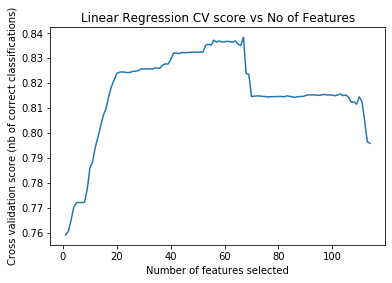

In [213]:
plt.figure()
plt.title('Linear Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [214]:
rfecv_rankinglist = rfecv.ranking_.tolist()
selected_columns2 = [n for im, n in enumerate(X_train) if rfecv_rankinglist[im]==1]

In [215]:
selected_columns2

['education_num',
 'workclass_ Local-gov',
 'workclass_ None',
 'workclass_ Private',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'martial-status_ Divorced',
 'martial-status_ Married-AF-spouse',
 'martial-status_ Married-civ-spouse',
 'martial-status_ Married-spouse-absent',
 'martial-status_ Never-married',
 'martial-status_ Separated',
 'martial-status_ Widowed',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ None',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'relationship_ Husband',
 'relationship_ Other-relative',
 'relationship_ Own-child',
 'relationship_ Unmarried',
 'relationship_ Wife',
 'race_ Amer-Indian-Eskimo',
 'race_ Asian-Pac-Islander',
 'race_ Black',
 'race_ Other',
 'race_ White',
 'sex_ Female',
 

In [216]:
lr_rfecv2 = LogisticRegression()
lr_rfecv2.fit(X_train[selected_columns2],y_train)
lr_rfecv2.score(X_test[selected_columns2],y_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8366920619316786

### LR Model Tuning after RFECV

In [217]:
lr_gscv.fit(X_train[selected_columns2], y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarn

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anacond

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWar

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
P

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWar

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
P

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWar

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'None'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch

In [218]:
lr_gscv.best_params_

{'C': 100, 'class_weight': 'None', 'penalty': 'l2', 'solver': 'newton-cg'}

In [219]:
lr_gscv.best_score_

0.837293047088715

In [221]:
lr_optimal_rfecv = LogisticRegression(C = 100, class_weight='None',penalty='l2', solver='newton-cg')
lr_optimal_rfecv.fit(X_train[selected_columns2], y_train)

LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
lr_train_acc_rfecv = accuracy_score(y_train, lr_optimal_rfecv.predict(X_train[selected_columns2]))

In [224]:
y_pred = lr_optimal_rfecv.predict(X_test[selected_columns2])

In [225]:
lr_test_acc_rfecv = accuracy_score(y_test, y_pred)

In [226]:
LR_opt_rfecv = pd.DataFrame(['LR',lr_train_acc_rfecv,lr_test_acc_rfecv])
LR_opt_rfecv = LR_opt_rfecv.transpose()
LR_opt_rfecv.columns = ['Models','Accuracy_x','Accuracy_y']
LR_opt_rfecv = LR_opt_rfecv.set_index('Models')
LR_opt_rfecv = pd.concat([LR_opt_rfecv.filter(like='_x'),
           LR_opt_rfecv.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))
LR_opt_rfecv

,Training,Testing
,Accuracy_x,Accuracy_y
Models,,
LR,0.837846,0.837184


Ended up with a better test accuracy using RFECV first, then using the resulting features into tuning the parameters.

    Initial Test Acc = 0.7973
    VIF Acc = 0.7995
    Model Tuning = 0.8289
    RFECV = 0.8367
    Model Tuning > RFECV = 0.7988
    RFECV > Model Tuning = 0.8372

### Random Forest

In [227]:
rf_rfecv = RandomForestClassifier()
rfecv = RFECV(rf_rfecv, step=1, cv=5, scoring = 'accuracy')

In [ ]:
rf_rfecv = rfecv.fit(X_train, y_train)

In [ ]:
plt.figure()
plt.title('Random Forest CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rf_rfecv.grid_scores_) + 1), rf_rfecv.grid_scores_)
plt.show()

In [ ]:
rf_rfecv_rankinglist = rf_rfecv.ranking_.tolist()
rf_selected_columns2 = [n for im, n in enumerate(X_train) if rf_rfecv_rankinglist[im]==1]

In [ ]:
rf_rfecv2 = RandomForestClassifier()
rf_rfecv2.fit(X_train[rf_selected_columns2],y_train)
rf_rfecv2.score(X_test[rf_selected_columns2],y_test)

### RF RFECV > Model Tuning

In [ ]:
rf_gscv2 = GridSearchCV(rf_mt, rf_grid_parameters, cv=5)

In [217]:
rf_gscv2.fit(X_train[selected_columns2], y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarn

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anacond

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWar

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
P

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWar

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
P

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWar

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'None'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch

In [218]:
rf_gscv2.best_params_

{'C': 100, 'class_weight': 'None', 'penalty': 'l2', 'solver': 'newton-cg'}

In [219]:
rf_gscv2.best_score_

0.837293047088715

In [221]:
rf_optimal_rfecv = RandomForestClassifer(C = 100, class_weight='None',penalty='l2', solver='newton-cg')
rf_optimal_rfecv.fit(X_train[selected_columns2], y_train)

LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
rf_train_acc_rfecv = accuracy_score(y_train, rf_optimal_rfecv.predict(X_train[selected_columns2]))

In [224]:
y_pred = rf_optimal_rfecv.predict(X_test[selected_columns2])

In [225]:
rf_test_acc_rfecv = accuracy_score(y_test, y_pred)

In [226]:
RF_opt_rfecv = pd.DataFrame(['RF',rf_train_acc_rfecv,rf_test_acc_rfecv])
RF_opt_rfecv = RF_opt_rfecv.transpose()
RF_opt_rfecv.columns = ['Models','Accuracy_x','Accuracy_y']
RF_opt_rfecv = RF_opt_rfecv.set_index('Models')
RF_opt_rfecv = pd.concat([RF_opt_rfecv.filter(like='_x'),
           RF_opt_rfecv.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))
RF_opt_rfecv

,Training,Testing
,Accuracy_x,Accuracy_y
Models,,
LR,0.837846,0.837184


### Decision Tree

In [ ]:
dt_rfecv = DecisionTreeClassifier()
rfecv = RFECV(dt_rfecv, step=1, cv=5, scoring = 'accuracy')
rfecv.fit(X_train, y_train)

In [ ]:
plt.figure()
plt.title('Linear Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv_rankinglist = rfecv.ranking_.tolist()
selected_columns2 = [n for im, n in enumerate(X_train) if rfecv_rankinglist[im]==1]

In [ ]:
selected_columns2

In [ ]:
lr_rfecv2 = DecisionTreeClassifier()
lr_rfecv2.fit(X_train[selected_columns2],y_train)
lr_rfecv2.score(X_test[selected_columns2],y_test)

### DT RFECV > Model Tuning

In [ ]:
dt_gscv2 = GridSearchCV(dt_mt, dt_grid_parameters, cv=5)

In [ ]:
dt_gscv2.fit(X_train[selected_columns2], y_train)

In [218]:
dt_gscv2.best_params_

{'C': 100, 'class_weight': 'None', 'penalty': 'l2', 'solver': 'newton-cg'}

In [219]:
dt_gscv2.best_score_

0.837293047088715

In [221]:
dt_optimal_rfecv = RandomForestClassifer(C = 100, class_weight='None',penalty='l2', solver='newton-cg')
dt_optimal_rfecv.fit(X_train[selected_columns2], y_train)

LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
dt_train_acc_rfecv = accuracy_score(y_train, dt_optimal_rfecv.predict(X_train[selected_columns2]))

In [224]:
y_pred = dt_optimal_rfecv.predict(X_test[selected_columns2])

In [225]:
dt_test_acc_rfecv = accuracy_score(y_test, y_pred)

In [226]:
dt_opt_rfecv = pd.DataFrame(['DT',dt_train_acc_rfecv,dt_test_acc_rfecv])
dt_opt_rfecv = dt_opt_rfecv.transpose()
dt_opt_rfecv.columns = ['Models','Accuracy_x','Accuracy_y']
dt_opt_rfecv = dt_opt_rfecv.set_index('Models')
dt_opt_rfecv = pd.concat([dt_opt_rfecv.filter(like='_x'),
           dt_opt_rfecv.filter(like='_y')],
           axis=1,
           keys=('Training','Testing'))
dt_opt_rfecv

,Training,Testing
,Accuracy_x,Accuracy_y
Models,,
LR,0.837846,0.837184


### KNN

In [ ]:
knn_rfecv = KNeighborsClassifier()
rfecv = RFECV(knn_rfecv, step=1, cv=3, scoring = 'accuracy')
rfecv.fit(X_train_pca, y_train)

In [ ]:
plt.figure()
plt.title('Linear Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv_rankinglist = rfecv.ranking_.tolist()
selected_columns2 = [n for im, n in enumerate(X_train) if rfecv_rankinglist[im]==1]

In [ ]:
lr_rfecv2 = RandomForestClassifier()
lr_rfecv2.fit(X_train[selected_columns2],y_train)
lr_rfecv2.score(X_test[selected_columns2],y_test)

### SVC

In [ ]:
# Too many features for SVC, will have to reduce using potentially K Score?

In [1]:
from sklearn.feature_selection import RFECV

In [ ]:
svc_rfecv = SVC(kernel = 'linear',
               probability = True)
rfecv = RFECV(svc_rfecv, step=1, cv=5, scoring ='accuracy')
rfecv.fit(X_train, y_train)

In [ ]:
plt.figure()
plt.title('Linear Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv_rankinglist = rfecv.ranking_.tolist()
selected_columns2 = [n for im, n in enumerate(X_train) if rfecv_rankinglist[im]==1]

In [ ]:
selected_columns2

In [ ]:
lr_rfecv2 = LogisticRegression()
lr_rfecv2.fit(X_train[selected_columns2],y_train)
lr_rfecv2.score(X_test[selected_columns2],y_test)

# Ensemble Methods

## Voting Classifier

### Non-Scaled Models

In [52]:
from sklearn.ensemble import VotingClassifier

In [69]:
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))

In [70]:
opt_models = []
opt_models.append(('DT', DecisionTreeClassifier(max_depth = 10,
                                    min_samples_leaf=10,
                                    min_samples_split=5,
                                   criterion='gini')))
opt_models.append(('RF', RandomForestClassifier(max_depth = 20,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                   n_estimators=200)))
opt_models.append(('LR', LogisticRegression(C = 1,
                                        class_weight='None',
                                        penalty='l2',
                                        solver='newton-cg')))

In [71]:
estimators = [m for m in models]

In [72]:
opt_estimators = [m for m in opt_models]

In [73]:
ensemble = VotingClassifier(estimators, voting='soft')

In [74]:
opt_ensemble = VotingClassifier(opt_estimators, voting='soft')

In [75]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
   

In [180]:
opt_ensemble.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('DT',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=10,
                                                       min_samples_split=5,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                      

In [196]:
vot_train = accuracy_score(y_train, ensemble.predict(X_train))

In [197]:
vot_test = ensemble.score(X_test, y_test)

In [198]:
vot_opt_train = accuracy_score(y_train, opt_ensemble.predict(X_train))

In [199]:
vot_opt_test = opt_ensemble.score(X_test, y_test)

### Scaled Models

In [79]:
scaled_models = []
scaled_models.append(('KNN', KNeighborsClassifier()))
scaled_models.append(('SVC', SVC(probability=True)))

In [100]:
opt_scaled_models = []
opt_scaled_models.append(('KNN', KNeighborsClassifier(leaf_size = 1,
                                    n_neighbors=8,
                                    n_jobs=-1)))
opt_scaled_models.append(('SVC', SVC(C = 0.1,
                                    gamma=0.1,
                                    kernel='linear',
                                    probability=True)))

In [83]:
sc_estimators = [m for m in scaled_models]

In [101]:
opt_scaled_estimators = [m for m in opt_scaled_models]

In [85]:
sc_ensemble = VotingClassifier(sc_estimators, voting='soft')

In [102]:
opt_scaled_ensemble = VotingClassifier(opt_scaled_estimators, voting='soft')

In [95]:
sc_ensemble.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('SVC',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False))],
                 flatten_transform=True, n_jobs=None, 

In [103]:
opt_scaled_ensemble.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=1,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=8,
                                                   p=2, weights='uniform')),
                             ('SVC',
                              SVC(C=0.1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.1, kernel='linear', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False))],
                 flatten_transform=True, n_jobs=None, voti

In [96]:
sc_ensemble.score(X_test_pca, y_test)

0.7634553944458098

In [104]:
opt_scaled_ensemble.score(X_test_pca, y_test)

0.787970017203244

## Stacking Classifier

### Non-Scaled Models

In [105]:
from sklearn.ensemble import StackingClassifier

In [109]:
st_models = []
st_models.append(('DT', DecisionTreeClassifier()))
st_models.append(('RF', RandomForestClassifier()))
#st_models.append(('LR', LogisticRegression()))

In [116]:
lr = LogisticRegression()
lr_opt = LogisticRegression(C = 1,
                            class_weight='None',
                            penalty='l2',
                            solver='newton-cg')

In [117]:
opt_st_models = []
opt_st_models.append(('DT', DecisionTreeClassifier(max_depth = 10,
                                    min_samples_leaf=10,
                                    min_samples_split=5,
                                   criterion='gini')))
opt_st_models.append(('RF', RandomForestClassifier(max_depth = 20,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                   n_estimators=200)))
#opt_st_models.append(('LR', LogisticRegression(C = 1,
                                        #class_weight='None',
                                       # penalty='l2',
                                        #solver='newton-cg')))

In [118]:
st_estimators = [m for m in st_models]

In [122]:
opt_st_estimators = [m for m in opt_st_models]

In [119]:
st_ensemble = StackingClassifier(estimators = st_estimators,
                                 final_estimator = lr)

In [125]:
opt_st_ensemble = StackingClassifier(estimators = opt_st_estimators,
                                 final_estimator = lr_opt)

In [120]:
st_ensemble.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('DT',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                     

In [126]:
opt_st_ensemble.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('DT',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=10,
                                                       min_samples_split=5,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                      

In [211]:
st_train = accuracy_score(y_train, st_ensemble.predict(X_train))

In [212]:
st_test = st_ensemble.score(X_test, y_test)

In [213]:
opt_st_train = accuracy_score(y_train, opt_st_ensemble.predict(X_train))

In [214]:
opt_st_test = opt_st_ensemble.score(X_test, y_test)

### Scaled Models

In [129]:
svc = SVC(probability=True)
svc_opt = SVC(C=0.1,
             gamma=0.1,
             kernel='linear',
             probability=True)

In [138]:
st_scaled_models = []
st_scaled_models.append(('KNN', KNeighborsClassifier()))
st_scaled_models.append(('SVC', SVC(probability=True)))
st_scaled_models.append(('DT', DecisionTreeClassifier()))
st_scaled_models.append(('RF', RandomForestClassifier()))

In [144]:
opt_st_scaled_models = []
opt_st_scaled_models.append(('DT', DecisionTreeClassifier(max_depth = 10,
                                    min_samples_leaf=10,
                                    min_samples_split=5,
                                   criterion='gini')))
opt_st_scaled_models.append(('RF', RandomForestClassifier(max_depth = 20,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                   n_estimators=200)))
#opt_st_models.append(('LR', LogisticRegression(C = 1,
                                        #class_weight='None',
                                       # penalty='l2',
                                        #solver='newton-cg')))
opt_st_scaled_models.append(('KNN', KNeighborsClassifier(leaf_size = 1,
                                    n_neighbors=8,
                                    n_jobs=-1)))
opt_st_scaled_models.append(('SVC', SVC(C = 0.1,
                                    gamma=0.1,
                                    kernel='linear',
                                    probability=True)))

In [139]:
stsc_estimators = [m for m in st_scaled_models]

In [145]:
opt_stscaled_estimators = [m for m in opt_st_scaled_models]

In [140]:
stsc_ensemble = StackingClassifier(estimators = stsc_estimators,
                                 final_estimator = lr)

In [146]:
opt_stscaled_ensemble = StackingClassifier(estimators = opt_stscaled_estimators,
                                 final_estimator = lr_opt)

In [141]:
stsc_ensemble.fit(X_train_scaled, y_train)

StackingClassifier(cv=None,
                   estimators=[('KNN',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform')),
                               ('SVC',
                                SVC(C=1.0, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma='scale', kernel='rbf', max_iter=-1,
                                    probabilit...
                                                       random_state=None,
                            

In [147]:
opt_stscaled_ensemble.fit(X_train_scaled, y_train)

StackingClassifier(cv=None,
                   estimators=[('DT',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=10,
                                                       min_samples_split=5,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                      

In [216]:
stsc_train = accuracy_score(y_train, stsc_ensemble.predict(X_train_scaled))

In [217]:
stsc_test = stsc_ensemble.score(X_test_scaled, y_test)

In [219]:
opt_stsc_train = accuracy_score(y_train, opt_stscaled_ensemble.predict(X_train_scaled))

In [220]:
opt_stsc_test = opt_stscaled_ensemble.score(X_test_scaled, y_test)

## Model Analysis

### Voting Classifier

In [188]:
v_pred = opt_ensemble.predict(X_test)

In [189]:
accuracy_score(y_test, v_pred)

0.8664905382157778

In [190]:
v_conf_matrix = confusion_matrix(y_test, v_pred)
v_confusion = pd.DataFrame(np.array(v_conf_matrix),
                      index=['<=50K','>50K'],
                      columns=['Predicted <=50K','Predicted >50K'])
v_confusion.style.set_caption('Voting Classifer Confusion Matrix')

,Predicted <=50K,Predicted >50K
<=50K,11861,569
>50K,1604,2242


In [191]:
v_class = classification_report(y_test, v_pred, output_dict=True)
v_class = pd.DataFrame(v_class).transpose()
v_class = v_class.rename(index={'0':'<=50K','1':'>50K'}).drop('accuracy',axis=0)
v_class.style.set_caption('Voting Classifer classification Report')

,precision,recall,f1-score,support
<=50K,0.880876,0.954224,0.916084,12430.000000
>50K,0.797581,0.582943,0.673577,3846.000000
macro avg,0.839229,0.768583,0.794830,16276.000000
weighted avg,0.861194,0.866491,0.858780,16276.000000


In [225]:
vot_class = pd.DataFrame([['VC',vot_train,vot_test],
                          ['Opt',vot_opt_train,vot_opt_test]])
vot_class.columns = ['Models','Accuracy_x','Accuracy_y']
vot_class = vot_class.set_index('Models')

In [226]:
vot_class = pd.concat([vot_class.filter(like='_x'),
                  vot_class.filter(like='_y')],
                 axis=1,
                 keys=('Training','Testing'))
vot_class.style.set_caption('Voting Classifier Models')

,Training,Testing
,Accuracy_x,Accuracy_y
Models,,
VC,0.999969,0.836201
Opt,0.899161,0.866491


### Stacking Classifier

In [174]:
st_pred = opt_st_ensemble.predict(X_test)

In [175]:
accuracy_score(y_test, st_pred)

0.8659375768001966

In [176]:
st_conf_matrix = confusion_matrix(y_test, st_pred)
st_confusion = pd.DataFrame(np.array(st_conf_matrix),
                      index=['<=50K','>50K'],
                      columns=['Predicted <=50K','Predicted >50K'])
st_confusion.style.set_caption('Stacking Classifer Confusion Matrix')

,Predicted <=50K,Predicted >50K
<=50K,11879,551
>50K,1631,2215


In [177]:
st_class = classification_report(y_test, st_pred, output_dict=True)
st_class = pd.DataFrame(st_class).transpose()
st_class = st_class.rename(index={'0':'<=50K','1':'>50K'}).drop('accuracy',axis=0)
st_class.style.set_caption('Stacking Classifer classification Report')

,precision,recall,f1-score,support
<=50K,0.879275,0.955672,0.915883,12430.000000
>50K,0.800795,0.575923,0.669994,3846.000000
macro avg,0.840035,0.765797,0.792938,16276.000000
weighted avg,0.860730,0.865938,0.857780,16276.000000


In [167]:
stopt = opt_stscaled_ensemble.predict(X_test_scaled)

In [168]:
accuracy_score(y_test,stopt)

0.8632956500368641

In [170]:
stsc_conf_matrix = confusion_matrix(y_test, stopt)
stsc_confusion = pd.DataFrame(np.array(stsc_conf_matrix),
                      index=['<=50K','>50K'],
                      columns=['Predicted <=50K','Predicted >50K'])
stsc_confusion.style.set_caption('Stacking Classifer Scaled Confusion Matrix')

,Predicted <=50K,Predicted >50K
<=50K,11844,586
>50K,1639,2207


In [172]:
stsc_class = classification_report(y_test, stopt, output_dict=True)
stsc_class = pd.DataFrame(stsc_class).transpose()
stsc_class = stsc_class.rename(index={'0':'<=50K','1':'>50K'}).drop('accuracy',axis=0)
stsc_class.style.set_caption('Stacking Classifer Scaled Classification Report')

,precision,recall,f1-score,support
<=50K,0.878440,0.952856,0.914136,12430.000000
>50K,0.790190,0.573843,0.664859,3846.000000
macro avg,0.834315,0.763349,0.789497,16276.000000
weighted avg,0.857586,0.863296,0.855232,16276.000000


In [215]:
st_class = pd.DataFrame([['SC',st_train,st_test],
                          ['Opt',opt_st_train,opt_st_test]])
st_class.columns = ['Models','Accuracy_x','Accuracy_y']
st_class = st_class.set_index('Models')
st_class

,Accuracy_x,Accuracy_y
Models,,
SC,0.999969,0.856230
Opt,0.899284,0.865938


In [221]:
opt_stsc_class = pd.DataFrame([['Scaled SC',stsc_train,stsc_test],
                          ['Scaled Opt',opt_stsc_train,opt_stsc_test]])
opt_stsc_class.columns = ['Models','Accuracy_x','Accuracy_y']
opt_stsc_class = opt_stsc_class.set_index('Models')
opt_stsc_class

,Accuracy_x,Accuracy_y
Models,,
Scaled SC,0.986293,0.841669
Scaled Opt,0.897409,0.863296


In [223]:
stack =st_class.append(opt_stsc_class)

In [224]:
stack = pd.concat([stack.filter(like='_x'),
                  stack.filter(like='_y')],
                 axis=1,
                 keys=('Training','Testing'))
stack.style.set_caption('Stacking Classifier Models')

,Training,Testing
,Accuracy_x,Accuracy_y
Models,,
SC,0.999969,0.856230
Opt,0.899284,0.865938
Scaled SC,0.986293,0.841669
Scaled Opt,0.897409,0.863296


## Save the Model

Reviewing all models created, the most accurate model is the optimised Voting Classifier model with an accuarcy of 86.65%

In [229]:
import joblib

In [235]:
filename = "best_model_Q2.sav"
joblib.dump(opt_ensemble,filename)

['best_model_Q2.sav']

In [238]:
loaded_model = joblib.load('best_model_Q2.sav')
result = loaded_model.score(X_test,y_test)
print('Test score: {0:.2f}%'.format(100*result))

Test score: 86.65%
